\begin{equation}
    \begin{aligned}
    \min_{x_{N-10}\dots x_N} & (x^T - x_{desired}) P (x - x_{desired}) \\
    \text{s.t.} 
    & \quad x_0 = x_{initial} \\
    & \quad 0 < y_k < y_{max} \quad \forall k=0\dots N-1\\
    & \quad 0 < F_k < F_{max} \quad \forall k=0\dots N-1\\ 
    & \quad -\delta_{min} < \delta_k < \delta_{max} \quad \forall k=0\dots N-1\\ 
    & \quad x_{k+1} = x_k + dt * \dot{x_k} \quad \forall k=0\dots N-1\\
    & \quad y_{k+1} = y_k + dt * \dot{y_k} \quad \forall k=0\dots N-1\\
    & \quad \theta_{k+1} = \theta_k + dt * \dot{\theta_k} \quad \forall k=0\dots N-1\\
    & \quad \dot{x}_{k+1} = \dot{x}_k + dt * (F*sin(\delta_k + \theta_k) /M - K* \dot{x}_k^2) \quad \forall k=0\dots N-1 \\
    & \quad \dot{y}_{k+1} = \dot{y}_k + dt * (F*cos(\delta_k + \theta_k) /M - K* \dot{y}_k^2) \quad \forall k=0\dots N-1 \\
    & \quad \dot{\theta}_{k+1} = \dot{\theta}_k + dt * (-F * L*sin(\delta_k) / (2*J)) \quad \forall k=0\dots N-1 \\
    & \quad \dot{m}_{k+1} = \dot{m} - dt * F * k_m \quad \forall k=0\dots N-1 \\

    \end{aligned}
\end{equation}
    

\begin{equation}
    \begin{aligned}
    \min_{x_{N-10}\dots x_N} & (x^T - x_{desired})P(x - x_{desired}) \\
    \end{aligned}
\end{equation}
    

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from matplotlib import patches as mpatches
from cmath import pi, sin, cos
from MPCsolution import MPC_solve 

class RocketPlt():
    """ Rocket class  """
    def __init__(self):
        self.BODY_LENGTH = 70 
        self.WING_LENGTH = 10
        self.body_angle = 0  # the angle of the body 
        self.wing_angle = 0 # the angle of the wing
        self.force_angle = 0 # the angle of the force from the body
        self.position = np.array([20000,200])
        self.engine_force = 0 
        self.history = [] # list of visited positions 

    def render_rocket(self):
        bottom_point = self.position
        top_point_x = self.position[0] + self.BODY_LENGTH * sin(self.body_angle)
        top_point_y = self.position[1] + self.BODY_LENGTH * cos(self.body_angle)
        body_line_x = [bottom_point[0], top_point_x]
        body_line_y = [bottom_point[1], top_point_y]
        plt.plot(body_line_x, body_line_y, c = 'blue', linewidth = 5) # draw the body 

        # draw wings 
        wing_angle = self.wing_angle + self.body_angle 
        wing_point_x = top_point_x - self.WING_LENGTH *sin(wing_angle)
        wing_point_y = top_point_y - self.WING_LENGTH *cos(wing_angle)
        wing_line_x = [top_point_x,wing_point_x]
        wing_line_y = [top_point_y,wing_point_y]
        plt.plot(wing_line_x, wing_line_y, c = 'green',linewidth = 2)

        # draw engine fires 
        engine_level = self.engine_force // 21e7
        fire_length = 10 * engine_level
        fire_width = engine_level // 2
        fire_angle = self.body_angle + self.force_angle

        fire_point_x = self.position[0] - fire_length * sin(fire_angle)
        fire_point_y = self.position[1] - fire_length * cos(fire_angle)
        fire_line_x = [self.position[0],fire_point_x]
        fire_line_y = [self.position[1],fire_point_y]
        self.history.append(np.array([self.position[0], self.position[1],top_point_x, top_point_y,
                            fire_point_x, fire_point_y, fire_angle, fire_width]))
        plt.plot(fire_line_x, fire_line_y, c = 'red', linewidth = fire_width)
        

def canvas_init():
    """ draw obstacles and target """
    plt.axis('equal')
    plt.title('ROCKET SIMULATION ENVIRONMENT')
    plt.autoscale(True)
    plt.xlabel('Distance / m ')
    plt.ylabel('Height / m')
    # draw land
    land = mpatches.Rectangle(land_point, 40000,200, color = 'y')
    ax.add_patch(land)
    # draw sea
    sea = mpatches.Rectangle(sea_point, 60000,200, color = 'b')
    ax.add_patch(sea)
    # draw land pad 
    land_pad = mpatches.Rectangle(land_pad_point,200,200,color = 'g')
    ax.add_patch(land_pad)
    # draw sea pad
    sea_pad = mpatches.Rectangle(sea_pad_point,200,200,color = 'g')
    ax.add_patch(sea_pad)



def simulation2D(x,u):
    # plt.cla()
    rocket.position = x[:2]
    rocket.body_angle = x[2]
    rocket.engine_force = u[0] if u[0] is not None else 0 
    rocket.force_angle = u[1] if u[1] is not None else 0 
    rocket.render_rocket()
    if len(rocket.history) < 5:
        frame_center = rocket.history[0]
        center_x,center_y = frame_center[0], frame_center[1]
        plt.xlim((center_x-200, center_x + 500))
        plt.ylim((center_y-500, center_y + 500))
    else:
        last_p = rocket.history[-1]
        first_p = rocket.history[-2]
        xbounds = (first_p[0] - 500, last_p[0] + 500)
        ybounds = (min(first_p[1], last_p[1])-500, max(first_p[1], last_p[1]) + 500)
        plt.xlim(xbounds)
        plt.ylim(ybounds)


# simulate now 

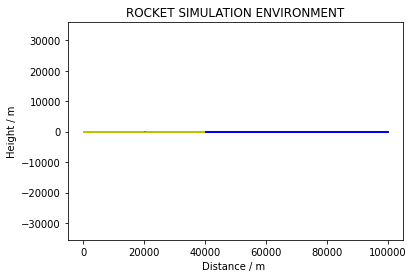

Solution done!
D:\Code_env\Python3\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Code_env\Python3\Anaconda3\lib\site-packages\matplotlib\transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


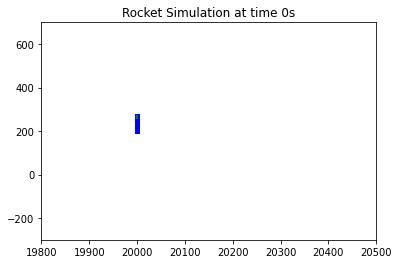

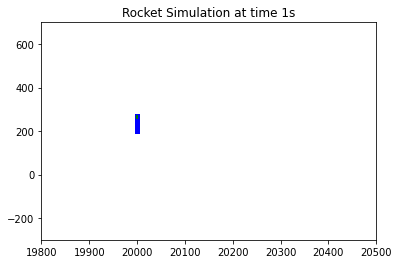

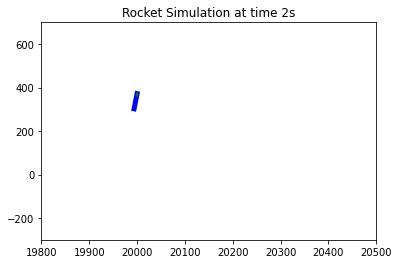

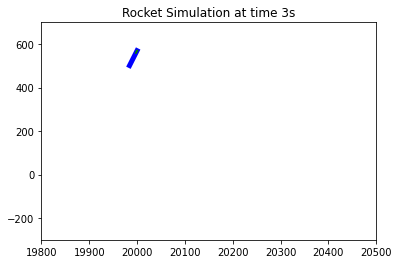

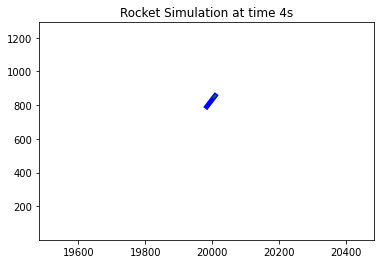

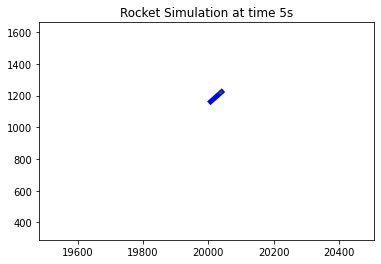

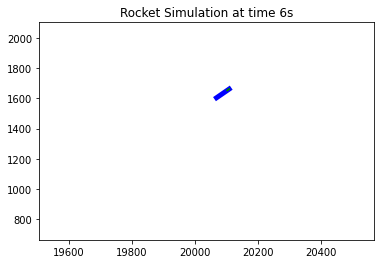

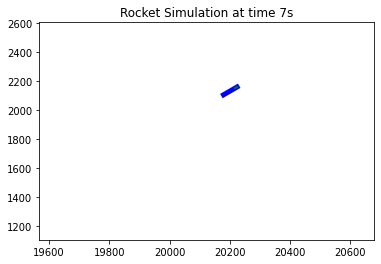

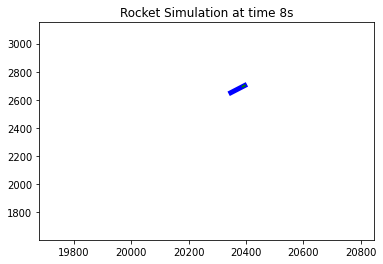

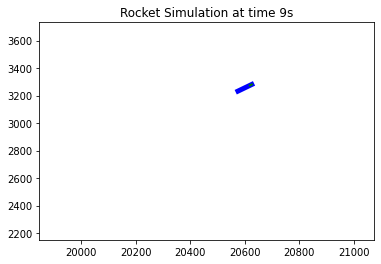

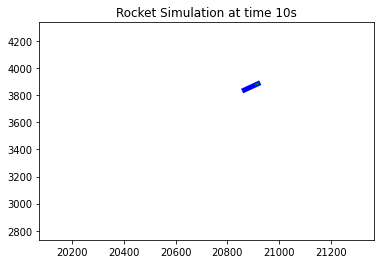

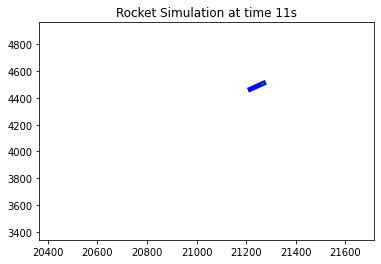

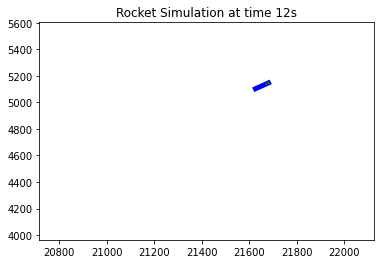

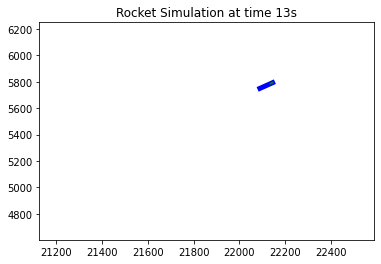

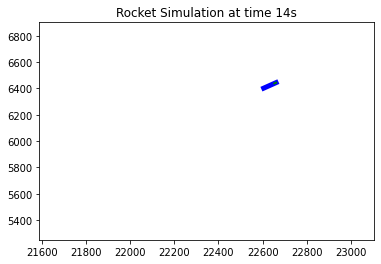

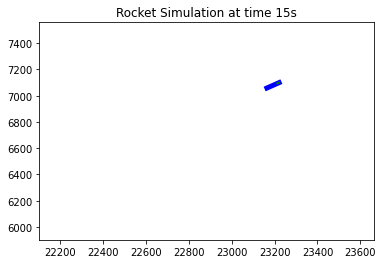

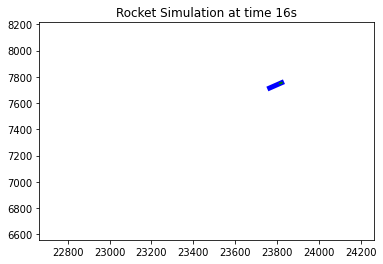

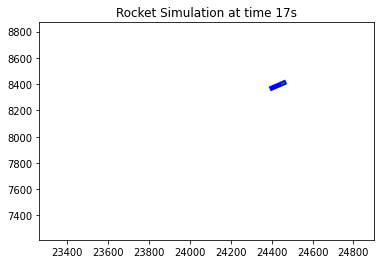

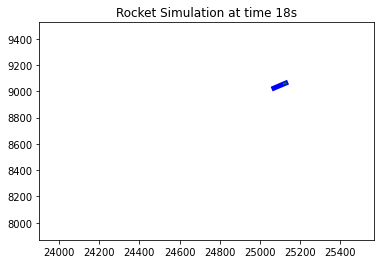

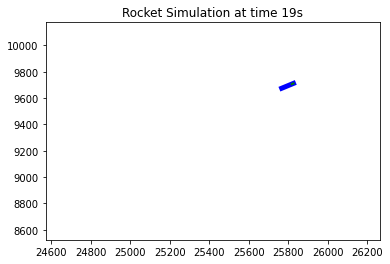

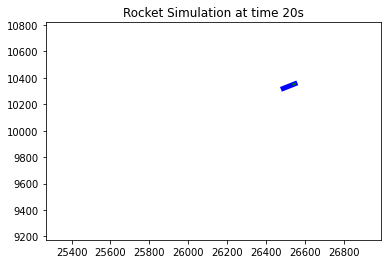

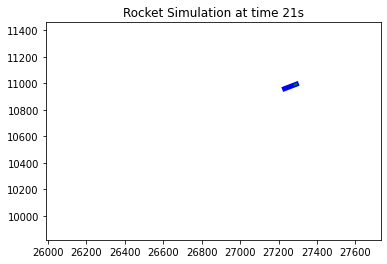

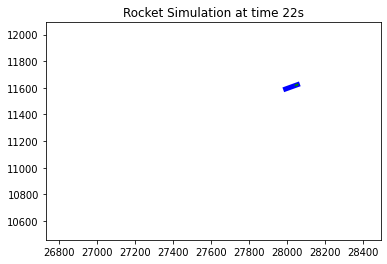

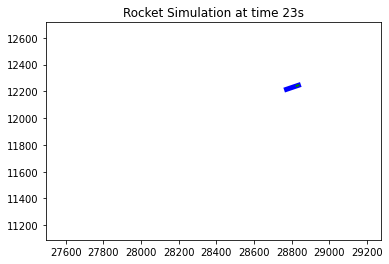

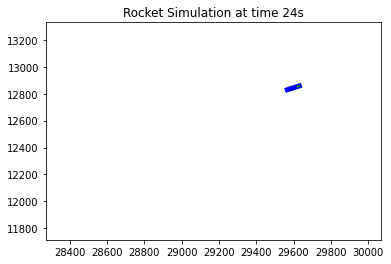

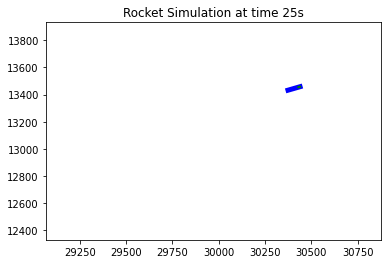

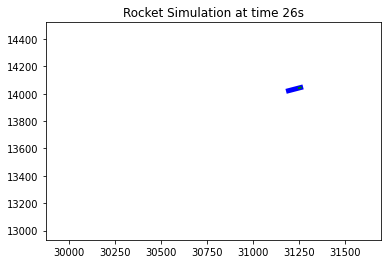

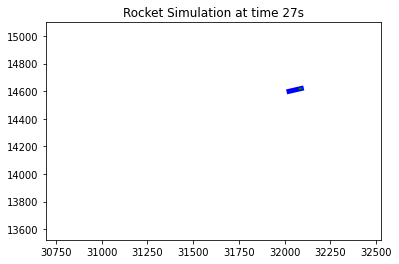

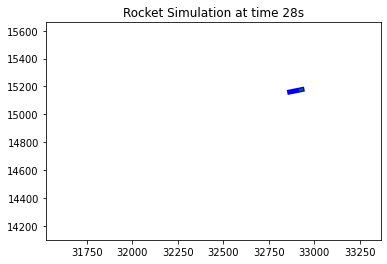

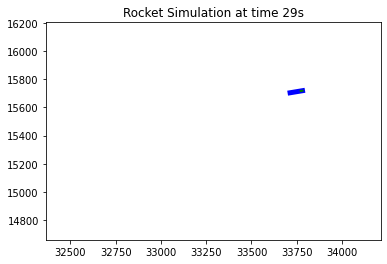

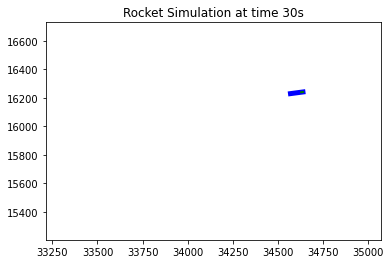

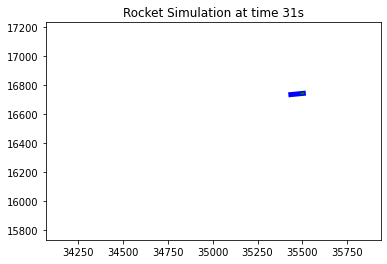

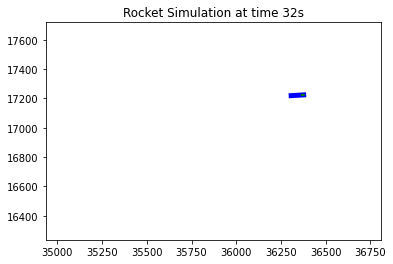

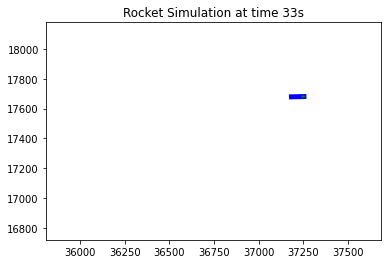

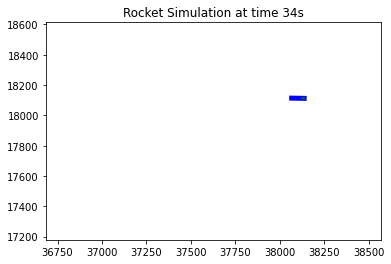

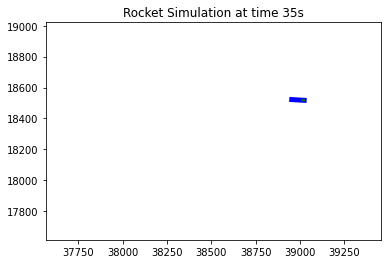

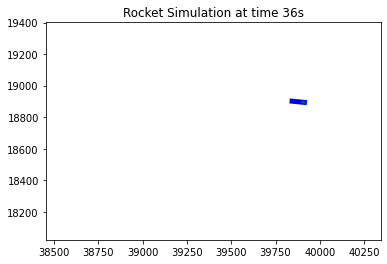

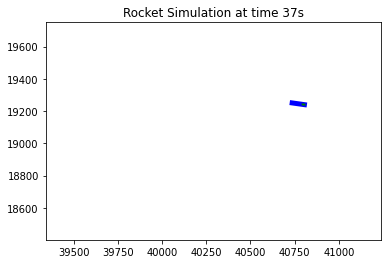

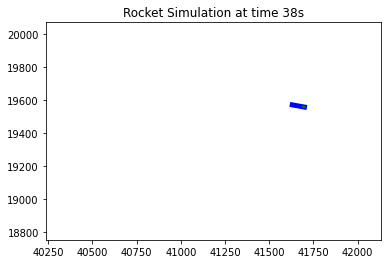

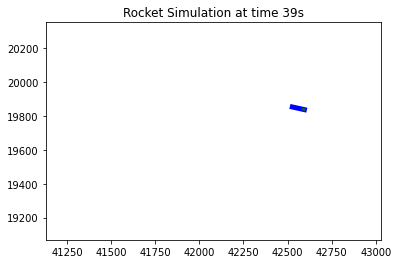

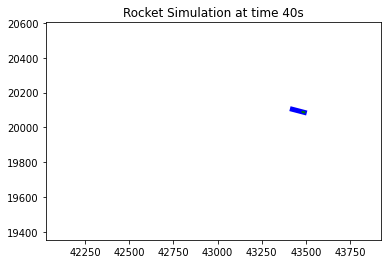

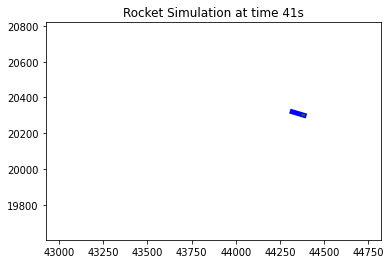

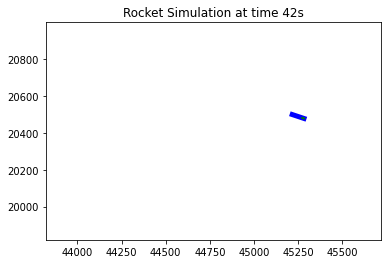

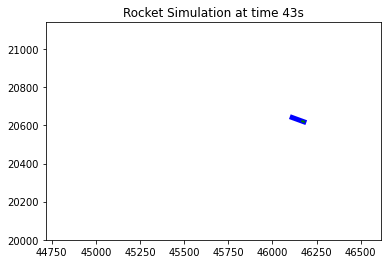

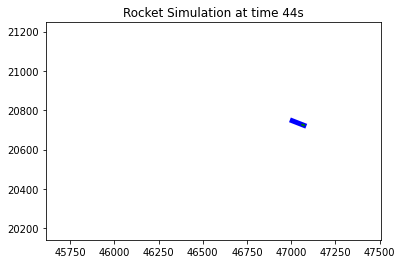

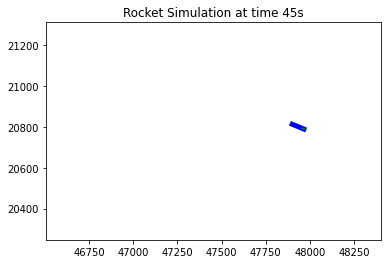

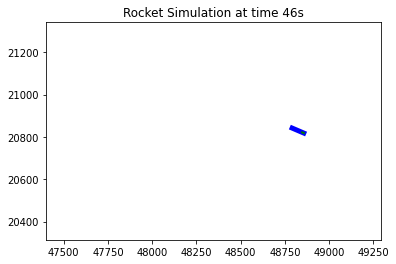

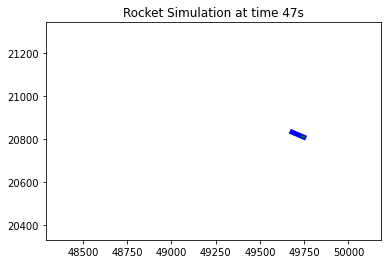

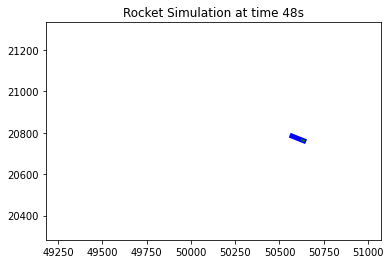

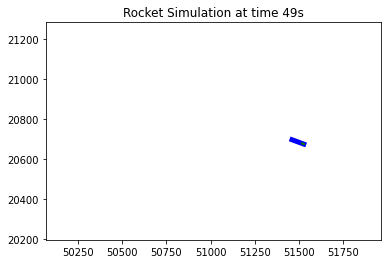

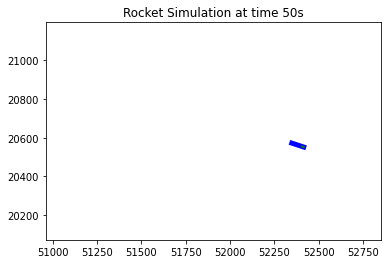

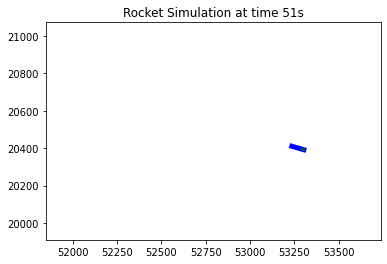

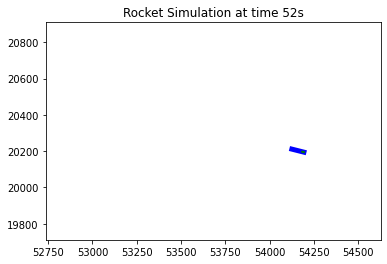

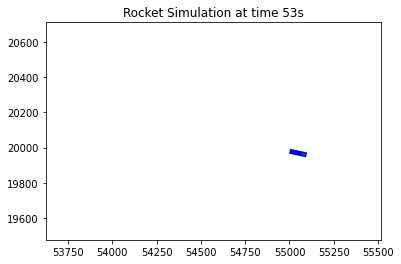

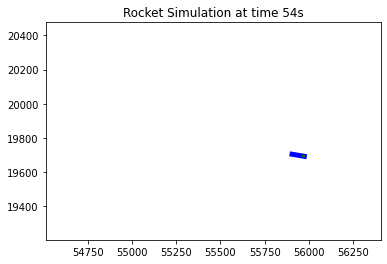

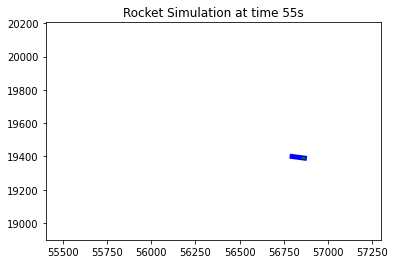

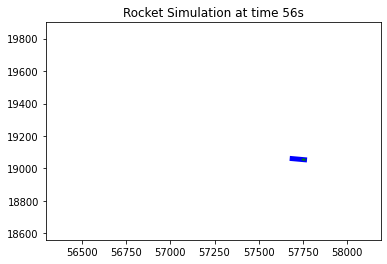

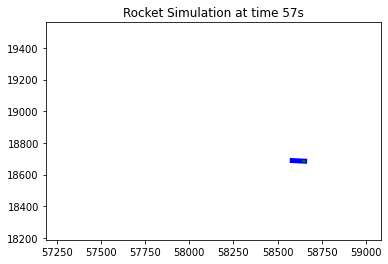

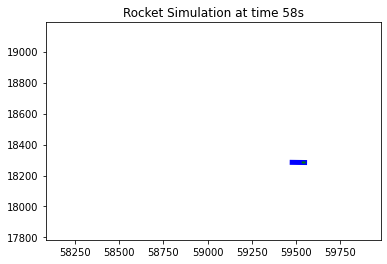

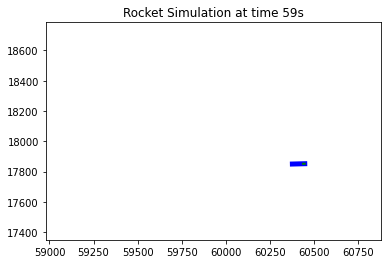

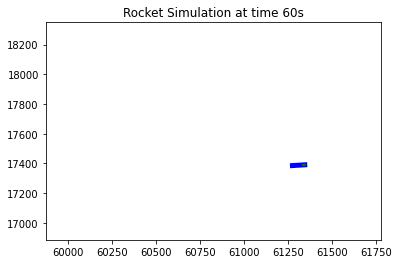

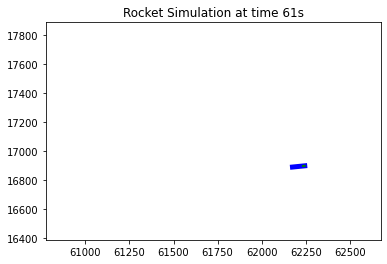

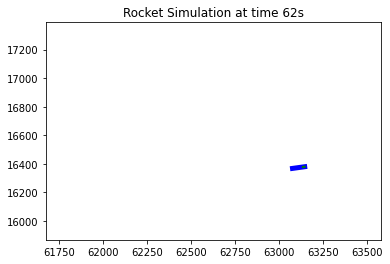

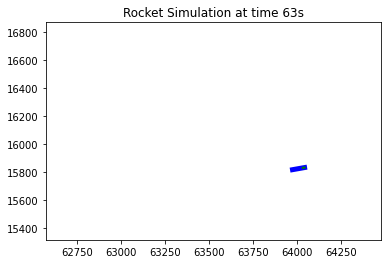

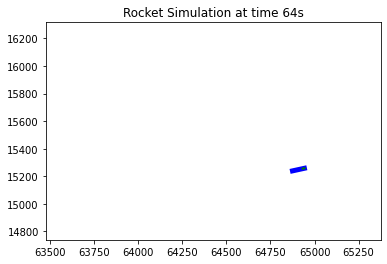

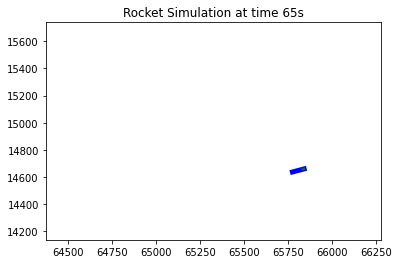

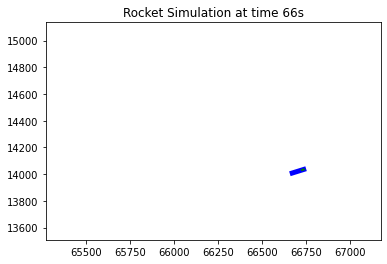

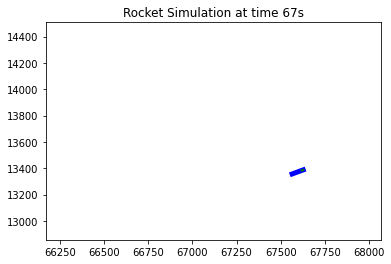

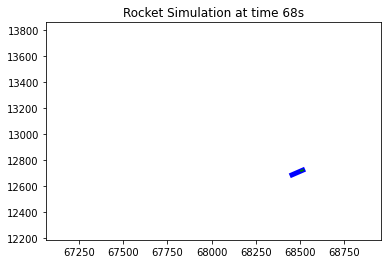

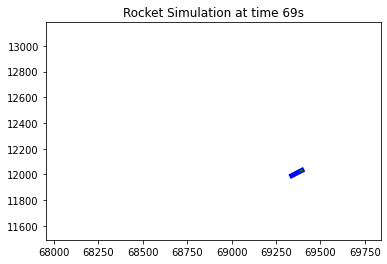

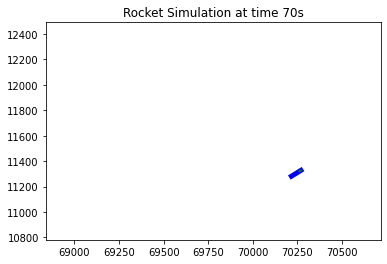

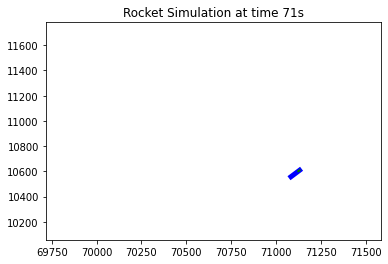

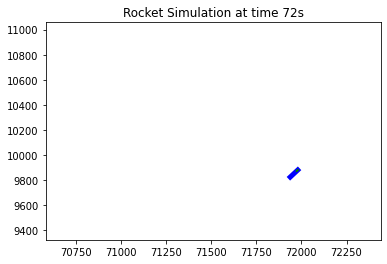

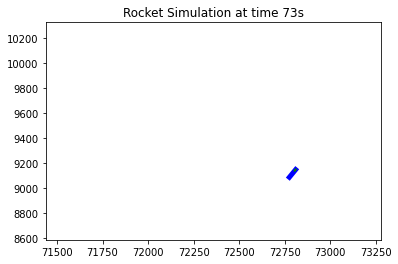

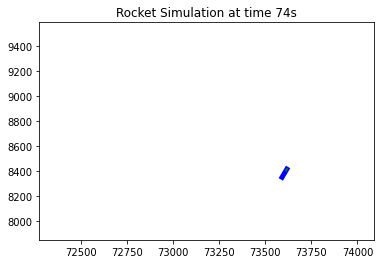

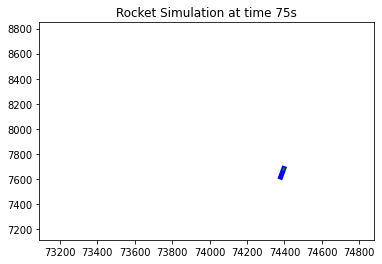

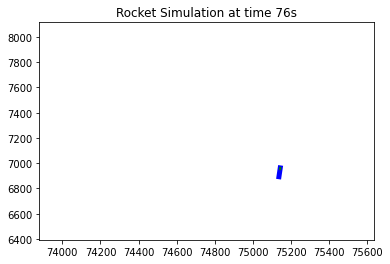

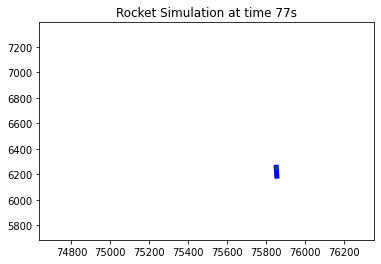

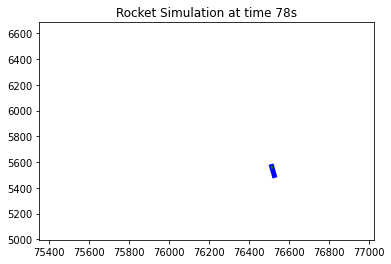

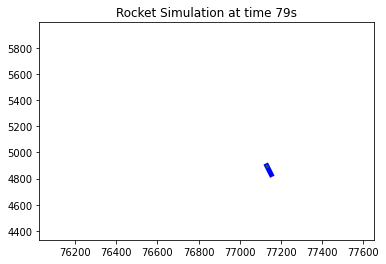

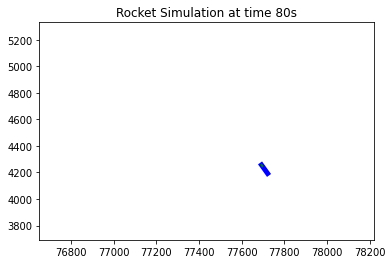

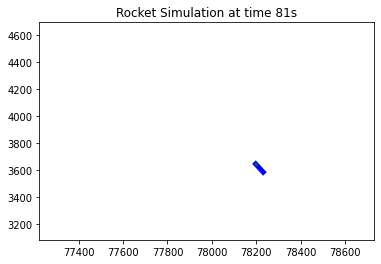

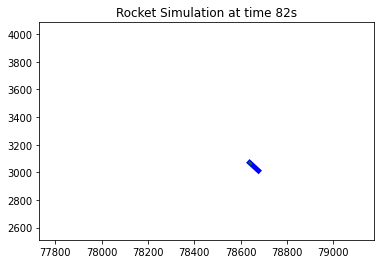

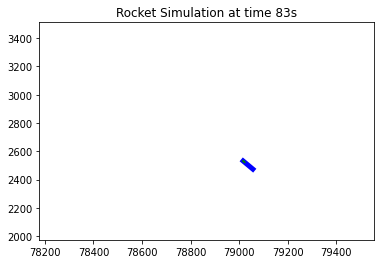

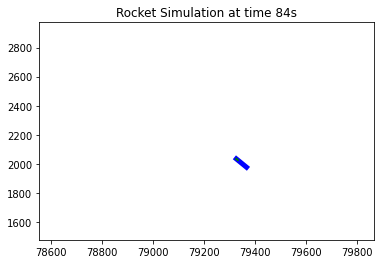

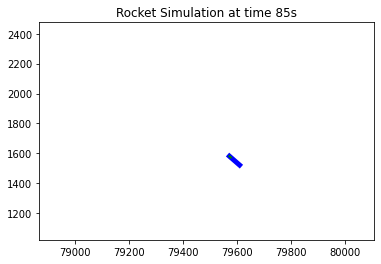

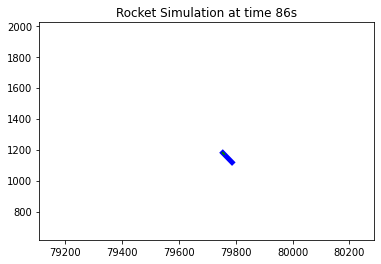

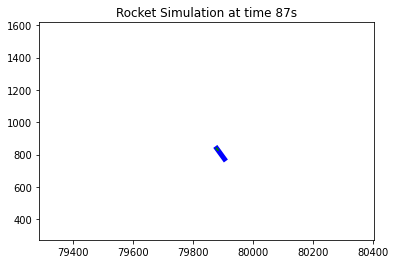

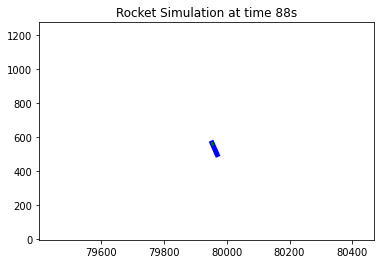

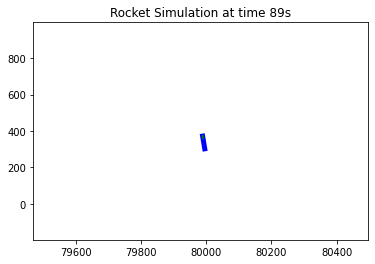

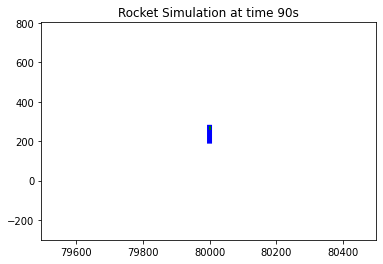

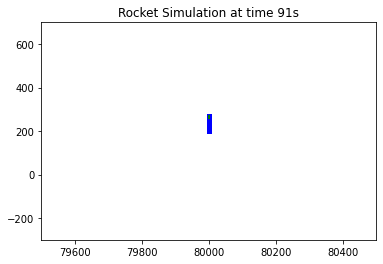

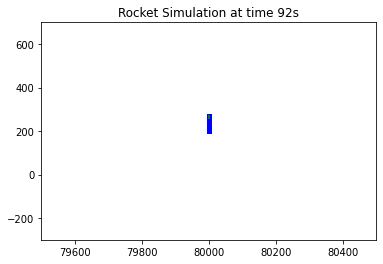

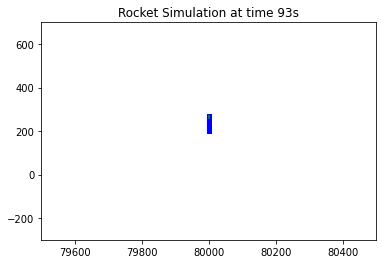

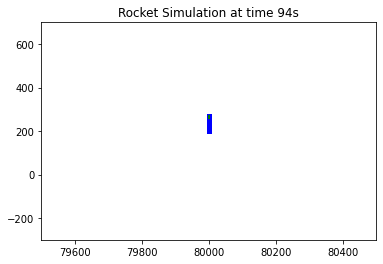

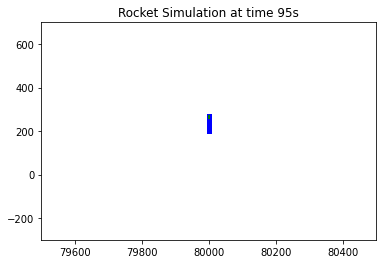

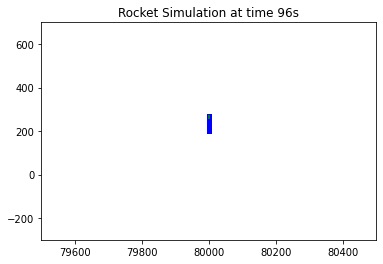

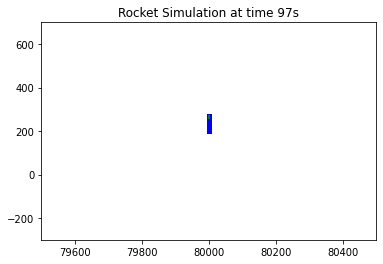

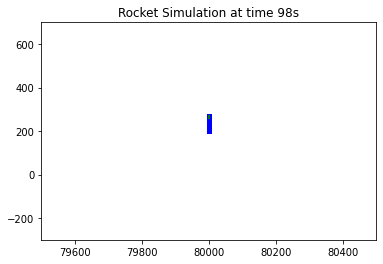

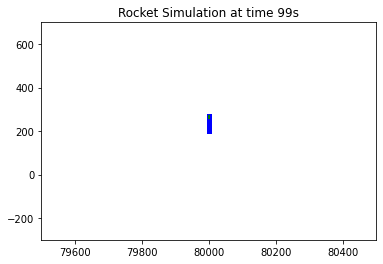

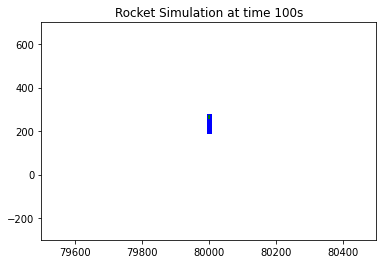

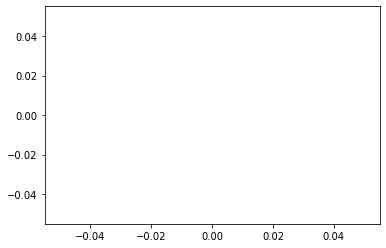

In [2]:
DT = 0.1  # the fresh time 
plt.ion()
fig, ax = plt.subplots() 
land_point = np.array([0.0, 0.0])  # the bottom left position of land
sea_point = np.array([40000, 0.0])   # the bottom left position of sea
land_pad_point = np.array([20000,180])
sea_pad_point = np.array([80000,180])
rocket = RocketPlt()

canvas_init()
plt.pause(1)
feas, xopt, uopt = MPC_solve() 

for t in range(len(xopt[0])):
    simulation2D(xopt[:,t], uopt[:,t])
    plt.title('Rocket Simulation at time %ss' %str(t))
    plt.pause(DT)
plt.autoscale(True)
plt.show()
plt.pause(10)

